## 티처빌 전처리

## pip install mecab-python3
## pip install unidic-lite
## pip install --no-binary :all: mecab-python3

## 참조
- https://serendipity77.tistory.com/entry/%EC%98%81%ED%99%94%EB%8F%99%EA%B0%90-%EC%98%81%ED%99%94%EB%8F%99%EA%B0%90-%EB%8C%93%EA%B8%80-%EB%A6%AC%EB%B7%B0-%EC%9B%8C%EB%93%9C-%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9Cwordcloud%EB%A1%9C-%EB%A7%8C%EB%93%A4%EC%96%B4%EB%B3%B4%EA%B8%B0%ED%8C%8C%EC%9D%B4%EC%8D%AC-Python
- https://christinarok.github.io/2021/04/08/mecab.html

In [95]:
import re
import os
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import konlpy
import tensorflow
from collections import Counter
from konlpy.tag import Mecab
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from wordcloud import WordCloud

In [ ]:

df = pd.read_csv('티처빌_2022.05.17~2023.10.23.csv', encoding='cp949')
df

,credit,name,text,star,category,date
0,1학점,"유쾌한 미술, 베스트 15 - 일당백","이번 연수, 유쾌한 미술 제목처럼 유쾌하고 유익한 시간이었습니다",5,인문·교양,2023-10-23
1,4학점,만물박사로 거듭나는 아하 그렇구나!,본 수업은 우리 주변 생활과 밀접하게 연관 되어진 수업이었습니다.\n다양한 강사분의...,5,인문·교양,2023-10-23
2,4학점,미술로 만나는 아이들의 심리,미술치료에 관한 다양한 사례를 설명들을 수 있었습니다. 특히 초등단계에서 적용할 수...,5,생활지도,2023-10-23
3,2학점,SPEAK UP GRAMMAR,학창시절 오랜 기간 동안 영어 공부를 하면서 배웠던 문법이지만 그 당시는 이해하기 ...,5,어학,2023-10-23
4,1학점,"미래교육의 첫 걸음, 학교자치","앞으로 교육청이나 교육부의 정해진 교육과정이 아니라 단위학교에서 교사,학생, 학부...",5,생활지도,2023-10-23
...,...,...,...,...,...,...
94303,2학점,영어로 배우는 영어수업 TEE,학생들의 영어 실력 향상에는 영어 입력의 양과 이해 가능한 입력 여부에 달려있다고 ...,3,교과지도,2022-05-17
94304,2학점,"불안의 시대, 교사를 위한 명리심리학","명리심리학을 통해 사주이해하기, 동료나 가족, 학생들과의 궁합 등을 이해할 수 있을...",5,인문·교양,2022-05-17
94305,2학점,"정혜신의 적정심리학, 당신이 옳다",교직생활을 하면서 지쳐있던 저에게 도움이 되는 연수였습니다. 연수를 통해 학생들이 ...,5,인문·교양,2022-05-17
94306,2학점,Live(생) 초보 영어회화 맛집,여행지에서 유용하게 활용할 수 있는 연수였습니다. 영어회화 초보인 선생님들께 적극 ...,5,어학,2022-05-17


In [ ]:
date_period = pd.date_range(start='2023-07-22', end='2023-10-22')
date_period = date_period.strftime('%Y-%m-%d')
date_list = [i for i in date_period]

In [ ]:
m = df['date'].apply(lambda x: True if x in date_list else False)
df = df[m]

In [ ]:
df

,credit,name,text,star,category,date
373,1학점,"1인 미디어 전성시대, 유튜브 브런치",유튜브 시청은 쉬워도 유튜브 제작은 마냥 어려운 일이었는데 그 간격을 조금은 줄여주...,4,디지털활용,2023-10-22
374,1학점,15가지 스킬로 끝내는 영어 리스닝 무작정 따라하기,귀에 쏙쏙 들어오게 설명해주셔서 정말 좋았어요. 감사합니다,5,어학,2023-10-22
375,0학점,2023년 학원 및 교습소 설립·운영자 연수,교습소 운영에 도움 되는 정보들을 얻을 수 있어 유익한 시간이 되었던 것 같습니다.,5,학습지도,2023-10-22
376,4학점,위로와 격려로 다시 쓰는 교사 위기 극복 가이드,좋은 연수예요. 듣기 부담스럽지 않으면서 어디서도 듣기 어려운 적당히 가볍고 적당히...,5,생활지도,2023-10-22
377,1학점,"아는 만큼 쌓이는 금융잔고, 교사 금융문맹 탈출기(주식, 부동산)",연수 제목과 맞게 금융문명탈출을 위한 기초적인 내용을 알게 되었어요. 차근차근 설...,4,인문·교양,2023-10-22
...,...,...,...,...,...,...
15108,1학점,현장 멘토들과 함께 하는 인도주의 실천 가이드,학교 교육에서 인성교육이 중요하다. 인도주의도 인성교육 측면에서 필요한데 연수를 통...,5,인문·교양,2023-07-22
15109,1학점,누구나 쉽게 할 수 있는 AI 코딩블록 (AI 코디니),코딩에 대한 기초적인 지식을 알 수 있었으며 티쳐블 머신이나 딥러닝 같은 개념들도 ...,5,디지털활용,2023-07-22
15110,1학점,"미래교육의 첫 걸음, 학교자치",모바일 연수로 좋았어요. 자치에 대한 이론적 개념이 좋았구요 실제적 예시가 더 있으...,5,생활지도,2023-07-22
15111,2학점,스마트한 교실을 위한 영재교육비법,이번 연수를 통해 재능이 뛰어난 학생을 조기에 발굴하여 타고난 잠재력을 계발할 수 ...,5,학습지도,2023-07-22


In [ ]:
df.rename(columns = {'text' : 'reviews',
                       'star' : 'ratings'}, inplace=True)
df

C:\Users\user\AppData\Local\Temp\ipykernel_15008\1818695201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'text' : 'reviews',


,credit,name,reviews,ratings,category,date
373,1학점,"1인 미디어 전성시대, 유튜브 브런치",유튜브 시청은 쉬워도 유튜브 제작은 마냥 어려운 일이었는데 그 간격을 조금은 줄여주...,4,디지털활용,2023-10-22
374,1학점,15가지 스킬로 끝내는 영어 리스닝 무작정 따라하기,귀에 쏙쏙 들어오게 설명해주셔서 정말 좋았어요. 감사합니다,5,어학,2023-10-22
375,0학점,2023년 학원 및 교습소 설립·운영자 연수,교습소 운영에 도움 되는 정보들을 얻을 수 있어 유익한 시간이 되었던 것 같습니다.,5,학습지도,2023-10-22
376,4학점,위로와 격려로 다시 쓰는 교사 위기 극복 가이드,좋은 연수예요. 듣기 부담스럽지 않으면서 어디서도 듣기 어려운 적당히 가볍고 적당히...,5,생활지도,2023-10-22
377,1학점,"아는 만큼 쌓이는 금융잔고, 교사 금융문맹 탈출기(주식, 부동산)",연수 제목과 맞게 금융문명탈출을 위한 기초적인 내용을 알게 되었어요. 차근차근 설...,4,인문·교양,2023-10-22
...,...,...,...,...,...,...
15108,1학점,현장 멘토들과 함께 하는 인도주의 실천 가이드,학교 교육에서 인성교육이 중요하다. 인도주의도 인성교육 측면에서 필요한데 연수를 통...,5,인문·교양,2023-07-22
15109,1학점,누구나 쉽게 할 수 있는 AI 코딩블록 (AI 코디니),코딩에 대한 기초적인 지식을 알 수 있었으며 티쳐블 머신이나 딥러닝 같은 개념들도 ...,5,디지털활용,2023-07-22
15110,1학점,"미래교육의 첫 걸음, 학교자치",모바일 연수로 좋았어요. 자치에 대한 이론적 개념이 좋았구요 실제적 예시가 더 있으...,5,생활지도,2023-07-22
15111,2학점,스마트한 교실을 위한 영재교육비법,이번 연수를 통해 재능이 뛰어난 학생을 조기에 발굴하여 타고난 잠재력을 계발할 수 ...,5,학습지도,2023-07-22


In [ ]:
df['label'] = np.select([df.ratings > 3], [1], default=0)
df

C:\Users\user\AppData\Local\Temp\ipykernel_15008\3873744649.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = np.select([df.ratings > 3], [1], default=0)


,credit,name,reviews,ratings,category,date,label
373,1학점,"1인 미디어 전성시대, 유튜브 브런치",유튜브 시청은 쉬워도 유튜브 제작은 마냥 어려운 일이었는데 그 간격을 조금은 줄여주...,4,디지털활용,2023-10-22,1
374,1학점,15가지 스킬로 끝내는 영어 리스닝 무작정 따라하기,귀에 쏙쏙 들어오게 설명해주셔서 정말 좋았어요. 감사합니다,5,어학,2023-10-22,1
375,0학점,2023년 학원 및 교습소 설립·운영자 연수,교습소 운영에 도움 되는 정보들을 얻을 수 있어 유익한 시간이 되었던 것 같습니다.,5,학습지도,2023-10-22,1
376,4학점,위로와 격려로 다시 쓰는 교사 위기 극복 가이드,좋은 연수예요. 듣기 부담스럽지 않으면서 어디서도 듣기 어려운 적당히 가볍고 적당히...,5,생활지도,2023-10-22,1
377,1학점,"아는 만큼 쌓이는 금융잔고, 교사 금융문맹 탈출기(주식, 부동산)",연수 제목과 맞게 금융문명탈출을 위한 기초적인 내용을 알게 되었어요. 차근차근 설...,4,인문·교양,2023-10-22,1
...,...,...,...,...,...,...,...
15108,1학점,현장 멘토들과 함께 하는 인도주의 실천 가이드,학교 교육에서 인성교육이 중요하다. 인도주의도 인성교육 측면에서 필요한데 연수를 통...,5,인문·교양,2023-07-22,1
15109,1학점,누구나 쉽게 할 수 있는 AI 코딩블록 (AI 코디니),코딩에 대한 기초적인 지식을 알 수 있었으며 티쳐블 머신이나 딥러닝 같은 개념들도 ...,5,디지털활용,2023-07-22,1
15110,1학점,"미래교육의 첫 걸음, 학교자치",모바일 연수로 좋았어요. 자치에 대한 이론적 개념이 좋았구요 실제적 예시가 더 있으...,5,생활지도,2023-07-22,1
15111,2학점,스마트한 교실을 위한 영재교육비법,이번 연수를 통해 재능이 뛰어난 학생을 조기에 발굴하여 타고난 잠재력을 계발할 수 ...,5,학습지도,2023-07-22,1


In [ ]:
df.drop_duplicates(subset=['reviews'], inplace=True) # reviews 열에서 중복인 내용이 있다면 중복 제거
print('총 샘플의 수 :',len(df))

총 샘플의 수 : 14631


C:\Users\user\AppData\Local\Temp\ipykernel_15008\654959306.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset=['reviews'], inplace=True) # reviews 열에서 중복인 내용이 있다면 중복 제거


In [ ]:
print(df.isnull().values.any())  # null 값 유무 확인

False


In [ ]:
## 데이터 정제
# 한글과 공백을 제외하고 모두 제거

df['reviews'] = df['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
df['reviews'].replace('', np.nan, inplace=True)
df = df.dropna(axis=0)
print(df.isnull().sum())
print('전처리 후 샘플의 개수 :', len(df))

credit      0
name        0
reviews     0
ratings     0
category    0
date        0
label       0
dtype: int64
전처리 후 샘플의 개수 : 14628


C:\Users\user\AppData\Local\Temp\ipykernel_15008\2135766934.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviews'] = df['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
C:\Users\user\AppData\Local\Temp\ipykernel_15008\2135766934.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'] = df['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
C:\Users\user\AppData\Local\Temp\ipykernel_15008\2135766934.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'].replace('', np.nan, inplace=True)


In [ ]:
## 토큰화

mecab = Mecab()
print(mecab.morphs('와 이런 것도 상품이라고 차라리 내가 만드는 게 나을 뻔'))   ### 테스팅

Exception: The MeCab dictionary does not exist at "/usr/local/lib/mecab/dic/mecab-ko-dic". Is the dictionary correctly installed?
You can also try entering the dictionary path when initializing the Mecab class: "Mecab('/some/dic/path')"

In [ ]:
def stopword(x):
  result = []
  f = open("/content/drive/MyDrive/빅데이터5/BigData/불용어.txt", "r")
  stop_words = f.read().splitlines()
  for w in x:
    if w not in stop_words:
      result.append(w)

  return result

In [ ]:
df['tokenized'] = df['reviews'].apply(mecab.morphs)
df['tokenized'] = df['reviews'].apply(mecab.nouns)
df['tokenized'] = df['tokenized'].apply(lambda x: stopword(x))

<ipython-input-93-80fa32b8d0fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokenized'] = df['reviews'].apply(mecab.morphs)
<ipython-input-93-80fa32b8d0fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokenized'] = df['reviews'].apply(mecab.nouns)
<ipython-input-93-80fa32b8d0fe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [ ]:
negative_words = np.hstack(df[df.label == 0]['tokenized'].values)
positive_words = np.hstack(df[df.label == 1]['tokenized'].values)
print(positive_words)
print(negative_words)

['유튜브' '시청' '유튜브' ... '연수' '선생' '화이팅']
['수업' '준비' '수행' ... '학교' '업무' '도움']


In [ ]:
negative_word_count = Counter(negative_words)
positive_word_count = Counter(positive_words)
print(len(negative_word_count))
print(negative_word_count.most_common(20))
print(positive_word_count.most_common(20))

934
[('연수', 165), ('내용', 92), ('수', 81), ('강의', 63), ('생각', 56), ('교육', 50), ('도움', 44), ('학생', 39), ('수업', 34), ('교사', 30), ('필요', 24), ('설명', 24), ('부분', 23), ('감사', 21), ('이해', 21), ('학교', 21), ('문제', 19), ('활용', 19), ('강사', 18), ('동작', 18)]
[('연수', 9625), ('수', 8051), ('도움', 3503), ('감사', 3178), ('강의', 3119), ('내용', 2868), ('학생', 2483), ('유익', 2474), ('수업', 2448), ('생각', 2252), ('교육', 2087), ('활용', 1902), ('이해', 1792), ('학교', 1572), ('교사', 1352), ('선생', 1310), ('설명', 1301), ('필요', 1188), ('적용', 1061), ('방법', 1060)]


In [ ]:
pos_df = df[df['label'] == 1]
neg_df = df[df['label'] == 0]

In [ ]:
pos_nouns = pos_df['tokenized']
pos_nouns = pos_nouns.explode()
neg_nouns = neg_df['tokenized']
neg_nouns = neg_nouns.explode()

#### 긍정단어_데이터 == pos_nouns
#### 부정단어_데이터 == neg_nouns

In [ ]:
df_word = pd.DataFrame({'word' : neg_nouns})
df_word['count'] = df_word['word'].str.len()

df_word

,word,count
454,수업,2.0
454,준비,2.0
454,수행,2.0
454,평가,2.0
454,학급,2.0
...,...,...
14770,관련,2.0
14770,내용,2.0
14770,학교,2.0
14770,업무,2.0


In [ ]:
df_word = df_word.groupby('word', as_index = False).count().sort_values('count', ascending = False)
df_word

,word,count
517,연수,165
159,내용,92
412,수,81
20,강의,63
374,생각,56
...,...,...
387,선척,1
390,설정,1
391,섭외,1
392,성격,1


In [ ]:
dic_word = df_word.set_index('word').to_dict()['count']

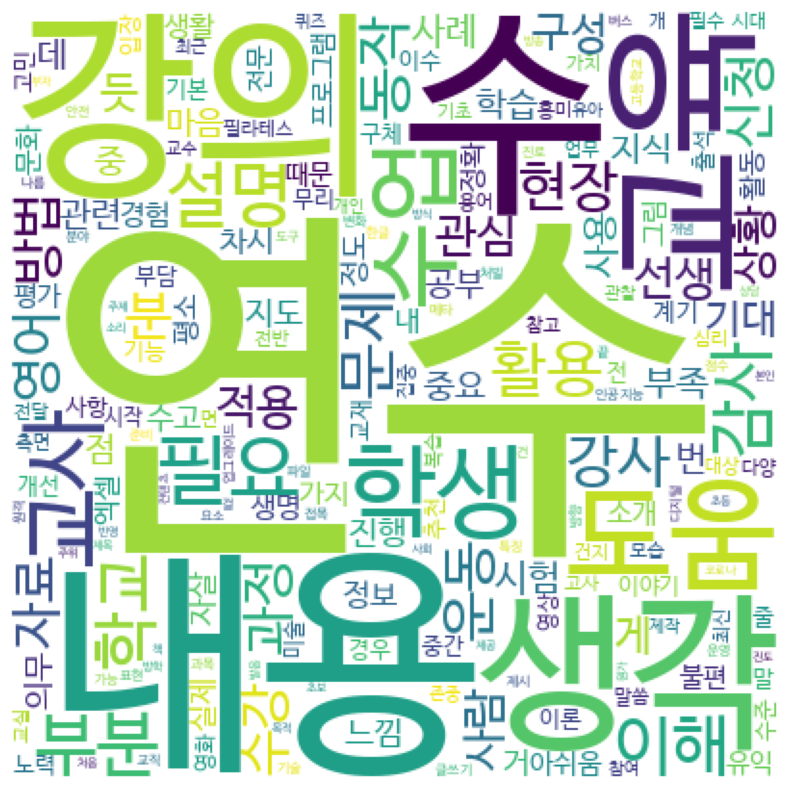

In [ ]:
## 시각
wc = WordCloud(random_state = 123, font_path = 'NanumBarunGothic', width = 400,
               height = 400, background_color = 'white')

img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기
plt.savefig('티처빌_워드클라우드') # 파일 저장